In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DLhVJCl8QLr7KygV36XO")
project = rf.workspace("gerapothole").project("pothole-detection-yolov8")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Pothole-detection-YOLOv8-1 in yolov8:: 100%|██████████| 2866/2866 [00:00<00:00, 4797.93it/s]


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.3/873.3 kB 23.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch

# Load a pretrained model (recommended for training)
model = YOLO('yolov10n.pt')

100%|██████████| 5.59M/5.59M [00:00<00:00, 123MB/s]


In [ ]:
model.train(data="/content/Pothole-detection-YOLOv8-1/data.yaml", epochs=100, imgsz=640)

Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/Pothole-detection-YOLOv8-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 134MB/s]


AMP: checks passed ✅


train: Scanning /content/Pothole-detection-YOLOv8-1/train/labels... 1245 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:00<00:00, 1801.44it/s]


train: New cache created: /content/Pothole-detection-YOLOv8-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Pothole-detection-YOLOv8-1/valid/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 702.90it/s]

val: New cache created: /content/Pothole-detection-YOLOv8-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.36G       3.49      6.357      3.721        113        640: 100%|██████████| 78/78 [00:32<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        120        492      0.636     0.0894      0.159     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.14G       3.54      5.249      3.599         88        640: 100%|██████████| 78/78 [00:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        120        492       0.29       0.22       0.18     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.09G      3.616      4.775       3.65         82        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        120        492      0.187       0.25     0.0971      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.13G      3.573      4.444      3.617         78        640: 100%|██████████| 78/78 [00:29<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        120        492      0.237      0.195      0.125      0.038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.04G      3.556      4.131      3.574         73        640: 100%|██████████| 78/78 [00:26<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        120        492      0.305      0.343      0.247     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.14G       3.52      4.049       3.58         38        640: 100%|██████████| 78/78 [00:26<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all        120        492      0.436      0.362      0.338      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.19G      3.481      3.873      3.489         92        640: 100%|██████████| 78/78 [00:28<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        120        492      0.434      0.419      0.334      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.09G      3.482      3.841       3.51        100        640: 100%|██████████| 78/78 [00:28<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        120        492      0.395      0.455      0.377      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.18G      3.445      3.845      3.516         45        640: 100%|██████████| 78/78 [00:26<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        120        492      0.412      0.307       0.28     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.02G       3.45      3.803      3.551         58        640: 100%|██████████| 78/78 [00:25<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        120        492      0.432      0.388      0.373       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.03G      3.424      3.721      3.528         87        640: 100%|██████████| 78/78 [00:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        120        492      0.502      0.455      0.421      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.11G      3.396      3.647      3.472         81        640: 100%|██████████| 78/78 [00:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        120        492      0.494      0.431      0.404      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.18G      3.382      3.502      3.455         87        640: 100%|██████████| 78/78 [00:26<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        120        492      0.453      0.411      0.386      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       3.1G       3.42      3.559      3.464         73        640: 100%|██████████| 78/78 [00:27<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        120        492       0.51      0.398      0.415      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.24G      3.331      3.485      3.424         58        640: 100%|██████████| 78/78 [00:28<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        120        492      0.516      0.392      0.388      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.11G      3.353       3.42      3.451        148        640: 100%|██████████| 78/78 [00:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        120        492      0.492      0.441      0.411      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.03G      3.286      3.386      3.402         90        640: 100%|██████████| 78/78 [00:26<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        120        492      0.499      0.488      0.457      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.03G      3.301      3.311      3.392        100        640: 100%|██████████| 78/78 [00:27<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        120        492      0.508      0.468      0.454      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.12G      3.297      3.339      3.408         65        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        120        492      0.544      0.465      0.477      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.02G      3.254      3.259      3.387         86        640: 100%|██████████| 78/78 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        120        492       0.52      0.473      0.476      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.14G      3.265      3.247      3.393         65        640: 100%|██████████| 78/78 [00:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        120        492      0.562      0.485      0.502      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.16G      3.255      3.291      3.391         64        640: 100%|██████████| 78/78 [00:26<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        120        492      0.507      0.506      0.471      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.12G      3.207      3.169       3.32        113        640: 100%|██████████| 78/78 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        120        492      0.507      0.457      0.459      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.13G      3.219      3.113       3.34        101        640: 100%|██████████| 78/78 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        120        492      0.544      0.488      0.486      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.1G        3.2      3.113      3.351         54        640: 100%|██████████| 78/78 [00:25<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        120        492      0.602      0.498      0.504      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.04G      3.199      3.077      3.351        101        640: 100%|██████████| 78/78 [00:27<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        120        492      0.505      0.472      0.442      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.03G      3.173      3.066      3.313        123        640: 100%|██████████| 78/78 [00:29<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        120        492      0.554      0.506      0.501      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.2G      3.194      3.022      3.332         79        640: 100%|██████████| 78/78 [00:28<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        120        492      0.507      0.482      0.443      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.14G      3.151       3.02      3.259         63        640: 100%|██████████| 78/78 [00:25<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        120        492      0.476      0.518      0.444      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.06G      3.143      2.958      3.275         58        640: 100%|██████████| 78/78 [00:26<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        120        492      0.542      0.486      0.486      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.14G      3.075      2.869      3.235         64        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        120        492      0.565      0.482      0.494      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.06G      3.096      2.846      3.251         59        640: 100%|██████████| 78/78 [00:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]


                   all        120        492       0.52      0.485      0.468      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.03G      3.115      2.918      3.277         95        640: 100%|██████████| 78/78 [00:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        120        492      0.588      0.497      0.514      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.23G      3.046      2.809      3.218         52        640: 100%|██████████| 78/78 [00:26<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        120        492      0.538      0.492      0.483      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.15G      3.078      2.835      3.247         74        640: 100%|██████████| 78/78 [00:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        120        492      0.598      0.457      0.509      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.17G      3.073      2.759      3.226         48        640: 100%|██████████| 78/78 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        120        492      0.595      0.473      0.507      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.21G      3.006      2.769      3.217         81        640: 100%|██████████| 78/78 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        120        492      0.524      0.514      0.473      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.12G      3.028      2.672      3.194        112        640: 100%|██████████| 78/78 [00:27<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        120        492       0.57      0.488        0.5      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.03G      3.007        2.7       3.15         92        640: 100%|██████████| 78/78 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        120        492      0.517      0.511      0.505      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.23G      3.003      2.694      3.181         72        640: 100%|██████████| 78/78 [00:27<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        120        492      0.552      0.476      0.497      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.24G      2.989      2.615       3.16         91        640: 100%|██████████| 78/78 [00:25<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        120        492      0.568      0.484      0.498      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.02G       2.97      2.633      3.184         94        640: 100%|██████████| 78/78 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]


                   all        120        492      0.591      0.459      0.492      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.2G      2.954      2.586      3.157         72        640: 100%|██████████| 78/78 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]


                   all        120        492      0.559      0.531      0.507      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         3G      2.951      2.566      3.153         71        640: 100%|██████████| 78/78 [00:26<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        120        492      0.538      0.478      0.482      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         3G       2.92      2.519      3.102        113        640: 100%|██████████| 78/78 [00:26<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        120        492      0.523      0.557      0.515      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.14G      2.923      2.458      3.086         89        640: 100%|██████████| 78/78 [00:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        120        492      0.596      0.524      0.543      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.07G      2.902      2.481      3.101         78        640: 100%|██████████| 78/78 [00:28<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        120        492      0.612       0.51      0.514      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.12G       2.87      2.447      3.097         70        640: 100%|██████████| 78/78 [00:26<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        120        492       0.55      0.533       0.51      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.15G      2.851      2.467       3.08        100        640: 100%|██████████| 78/78 [00:26<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        120        492      0.556      0.472      0.481      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.02G      2.838      2.412      3.096        100        640: 100%|██████████| 78/78 [00:28<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        120        492      0.525      0.567      0.528      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.03G      2.897      2.382      3.086         77        640: 100%|██████████| 78/78 [00:29<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        120        492      0.606       0.49      0.526      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.06G      2.862      2.401      3.084        106        640: 100%|██████████| 78/78 [00:26<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        120        492      0.516       0.53      0.502       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.11G      2.804      2.307      3.009        112        640: 100%|██████████| 78/78 [00:27<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        120        492      0.528      0.522      0.513      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.16G      2.814      2.287      3.049         63        640: 100%|██████████| 78/78 [00:28<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        120        492      0.588      0.512      0.526      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       3.1G      2.797      2.344      3.038         97        640: 100%|██████████| 78/78 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all        120        492      0.544      0.524      0.515      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.11G       2.77      2.279      3.007         66        640: 100%|██████████| 78/78 [00:26<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        120        492      0.585      0.508      0.531      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.24G      2.755      2.221      2.993        137        640: 100%|██████████| 78/78 [00:27<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        120        492      0.595      0.502      0.506      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.14G      2.768      2.242      2.993        104        640: 100%|██████████| 78/78 [00:29<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all        120        492      0.552      0.524      0.516      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.19G      2.702      2.196      2.967        112        640: 100%|██████████| 78/78 [00:29<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        120        492      0.605      0.504      0.517      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.11G      2.721      2.146      2.962        128        640: 100%|██████████| 78/78 [00:26<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        120        492        0.6      0.514      0.518      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.14G      2.723      2.218      2.977         66        640: 100%|██████████| 78/78 [00:28<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        120        492      0.606      0.478      0.496      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         3G      2.655      2.145      2.923         75        640: 100%|██████████| 78/78 [00:29<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        120        492      0.564      0.515      0.509      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.1G      2.662      2.153      2.941         81        640: 100%|██████████| 78/78 [00:31<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all        120        492      0.526      0.507      0.485      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.23G      2.661      2.088      2.946         86        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        120        492      0.606      0.507      0.518      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.05G       2.66      2.071      2.906         53        640: 100%|██████████| 78/78 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        120        492      0.598      0.475      0.505      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.06G      2.611      2.058      2.913         58        640: 100%|██████████| 78/78 [00:29<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        120        492      0.573      0.499      0.513      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.1G      2.637       2.08      2.927         59        640: 100%|██████████| 78/78 [00:30<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        120        492      0.642      0.478       0.52      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.08G      2.636       2.05      2.893         75        640: 100%|██████████| 78/78 [00:30<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        120        492       0.61      0.498      0.506      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.14G      2.584      2.016      2.849         77        640: 100%|██████████| 78/78 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        120        492      0.519      0.561      0.522      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.08G      2.578      2.023      2.871        100        640: 100%|██████████| 78/78 [00:26<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        120        492      0.626      0.478      0.516      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.09G      2.588      1.913      2.882         83        640: 100%|██████████| 78/78 [00:28<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        120        492      0.622      0.463      0.513      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.99G      2.548      1.999      2.868        101        640: 100%|██████████| 78/78 [00:29<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        120        492      0.636      0.505      0.536       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.08G      2.546      1.923      2.848         75        640: 100%|██████████| 78/78 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        120        492      0.631      0.514      0.541      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.19G      2.546      1.978      2.842        121        640: 100%|██████████| 78/78 [00:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        120        492      0.536      0.535      0.515      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.03G      2.485       1.94      2.814        110        640: 100%|██████████| 78/78 [00:27<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        120        492      0.608      0.476      0.512      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.04G      2.489      1.926      2.813         46        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        120        492      0.591      0.488      0.506      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.06G      2.537      1.995      2.859         74        640: 100%|██████████| 78/78 [00:29<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        120        492       0.55      0.524      0.515      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.29G      2.466      1.876      2.795        101        640: 100%|██████████| 78/78 [00:29<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        120        492      0.582      0.504      0.515      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.09G      2.505      1.907      2.793         62        640: 100%|██████████| 78/78 [00:27<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        120        492      0.613      0.502      0.525      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.03G      2.388      1.854      2.746        125        640: 100%|██████████| 78/78 [00:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]


                   all        120        492      0.635      0.508      0.528      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.08G      2.418      1.797      2.754         72        640: 100%|██████████| 78/78 [00:29<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        120        492      0.618      0.478      0.533       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.01G      2.437      1.832      2.747         88        640: 100%|██████████| 78/78 [00:29<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        120        492      0.605      0.507      0.535      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.14G      2.396       1.79      2.743        110        640: 100%|██████████| 78/78 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        120        492      0.593       0.52      0.536      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.08G       2.39      1.824      2.752        123        640: 100%|██████████| 78/78 [00:26<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        120        492      0.648       0.47      0.516      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       3.1G      2.357      1.776      2.739         80        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        120        492      0.628      0.524      0.552      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.05G      2.361      1.769      2.723         95        640: 100%|██████████| 78/78 [00:30<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        120        492      0.644      0.518      0.554      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       3.1G      2.317      1.739      2.699         80        640: 100%|██████████| 78/78 [00:29<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        120        492      0.665      0.498      0.537      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.99G      2.329      1.739      2.703         69        640: 100%|██████████| 78/78 [00:28<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        120        492      0.558      0.545      0.526      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.02G      2.331      1.752      2.719         62        640: 100%|██████████| 78/78 [00:26<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]

                   all        120        492       0.62      0.512       0.53      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.07G      2.325      1.764      2.704         98        640: 100%|██████████| 78/78 [00:28<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        120        492      0.628      0.514      0.531      0.214


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.1G      2.287      1.442       2.74         55        640: 100%|██████████| 78/78 [00:31<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        120        492      0.637       0.52      0.548      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.03G      2.221      1.321      2.703         50        640: 100%|██████████| 78/78 [00:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

                   all        120        492      0.602      0.539      0.543       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.02G      2.209      1.308      2.706         48        640: 100%|██████████| 78/78 [00:25<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        120        492      0.654      0.498      0.545      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.98G      2.129      1.256      2.632         31        640: 100%|██████████| 78/78 [00:28<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        120        492      0.571       0.52      0.533      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.03G      2.148      1.267      2.678         22        640: 100%|██████████| 78/78 [00:29<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all        120        492      0.612      0.508      0.546      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.02G      2.141      1.275       2.65         44        640: 100%|██████████| 78/78 [00:26<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        120        492      0.621      0.484      0.533      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         3G      2.129      1.269      2.639         29        640: 100%|██████████| 78/78 [00:26<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        120        492      0.613      0.498      0.528      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.02G      2.069      1.236      2.603         61        640: 100%|██████████| 78/78 [00:29<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all        120        492      0.604      0.528       0.54      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.03G      2.076      1.238      2.606         48        640: 100%|██████████| 78/78 [00:28<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        120        492       0.54      0.551      0.533      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.01G      2.069      1.223      2.607         34        640: 100%|██████████| 78/78 [00:25<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        120        492      0.616      0.492      0.539      0.221



100 epochs completed in 0.849 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.96 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


                   all        120        492      0.655      0.498      0.545      0.223
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca5267df820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!pip install pillow

In [ ]:
from PIL import Image


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
Image

<module 'PIL.Image' from '/usr/local/lib/python3.10/dist-packages/PIL/Image.py'>

/content


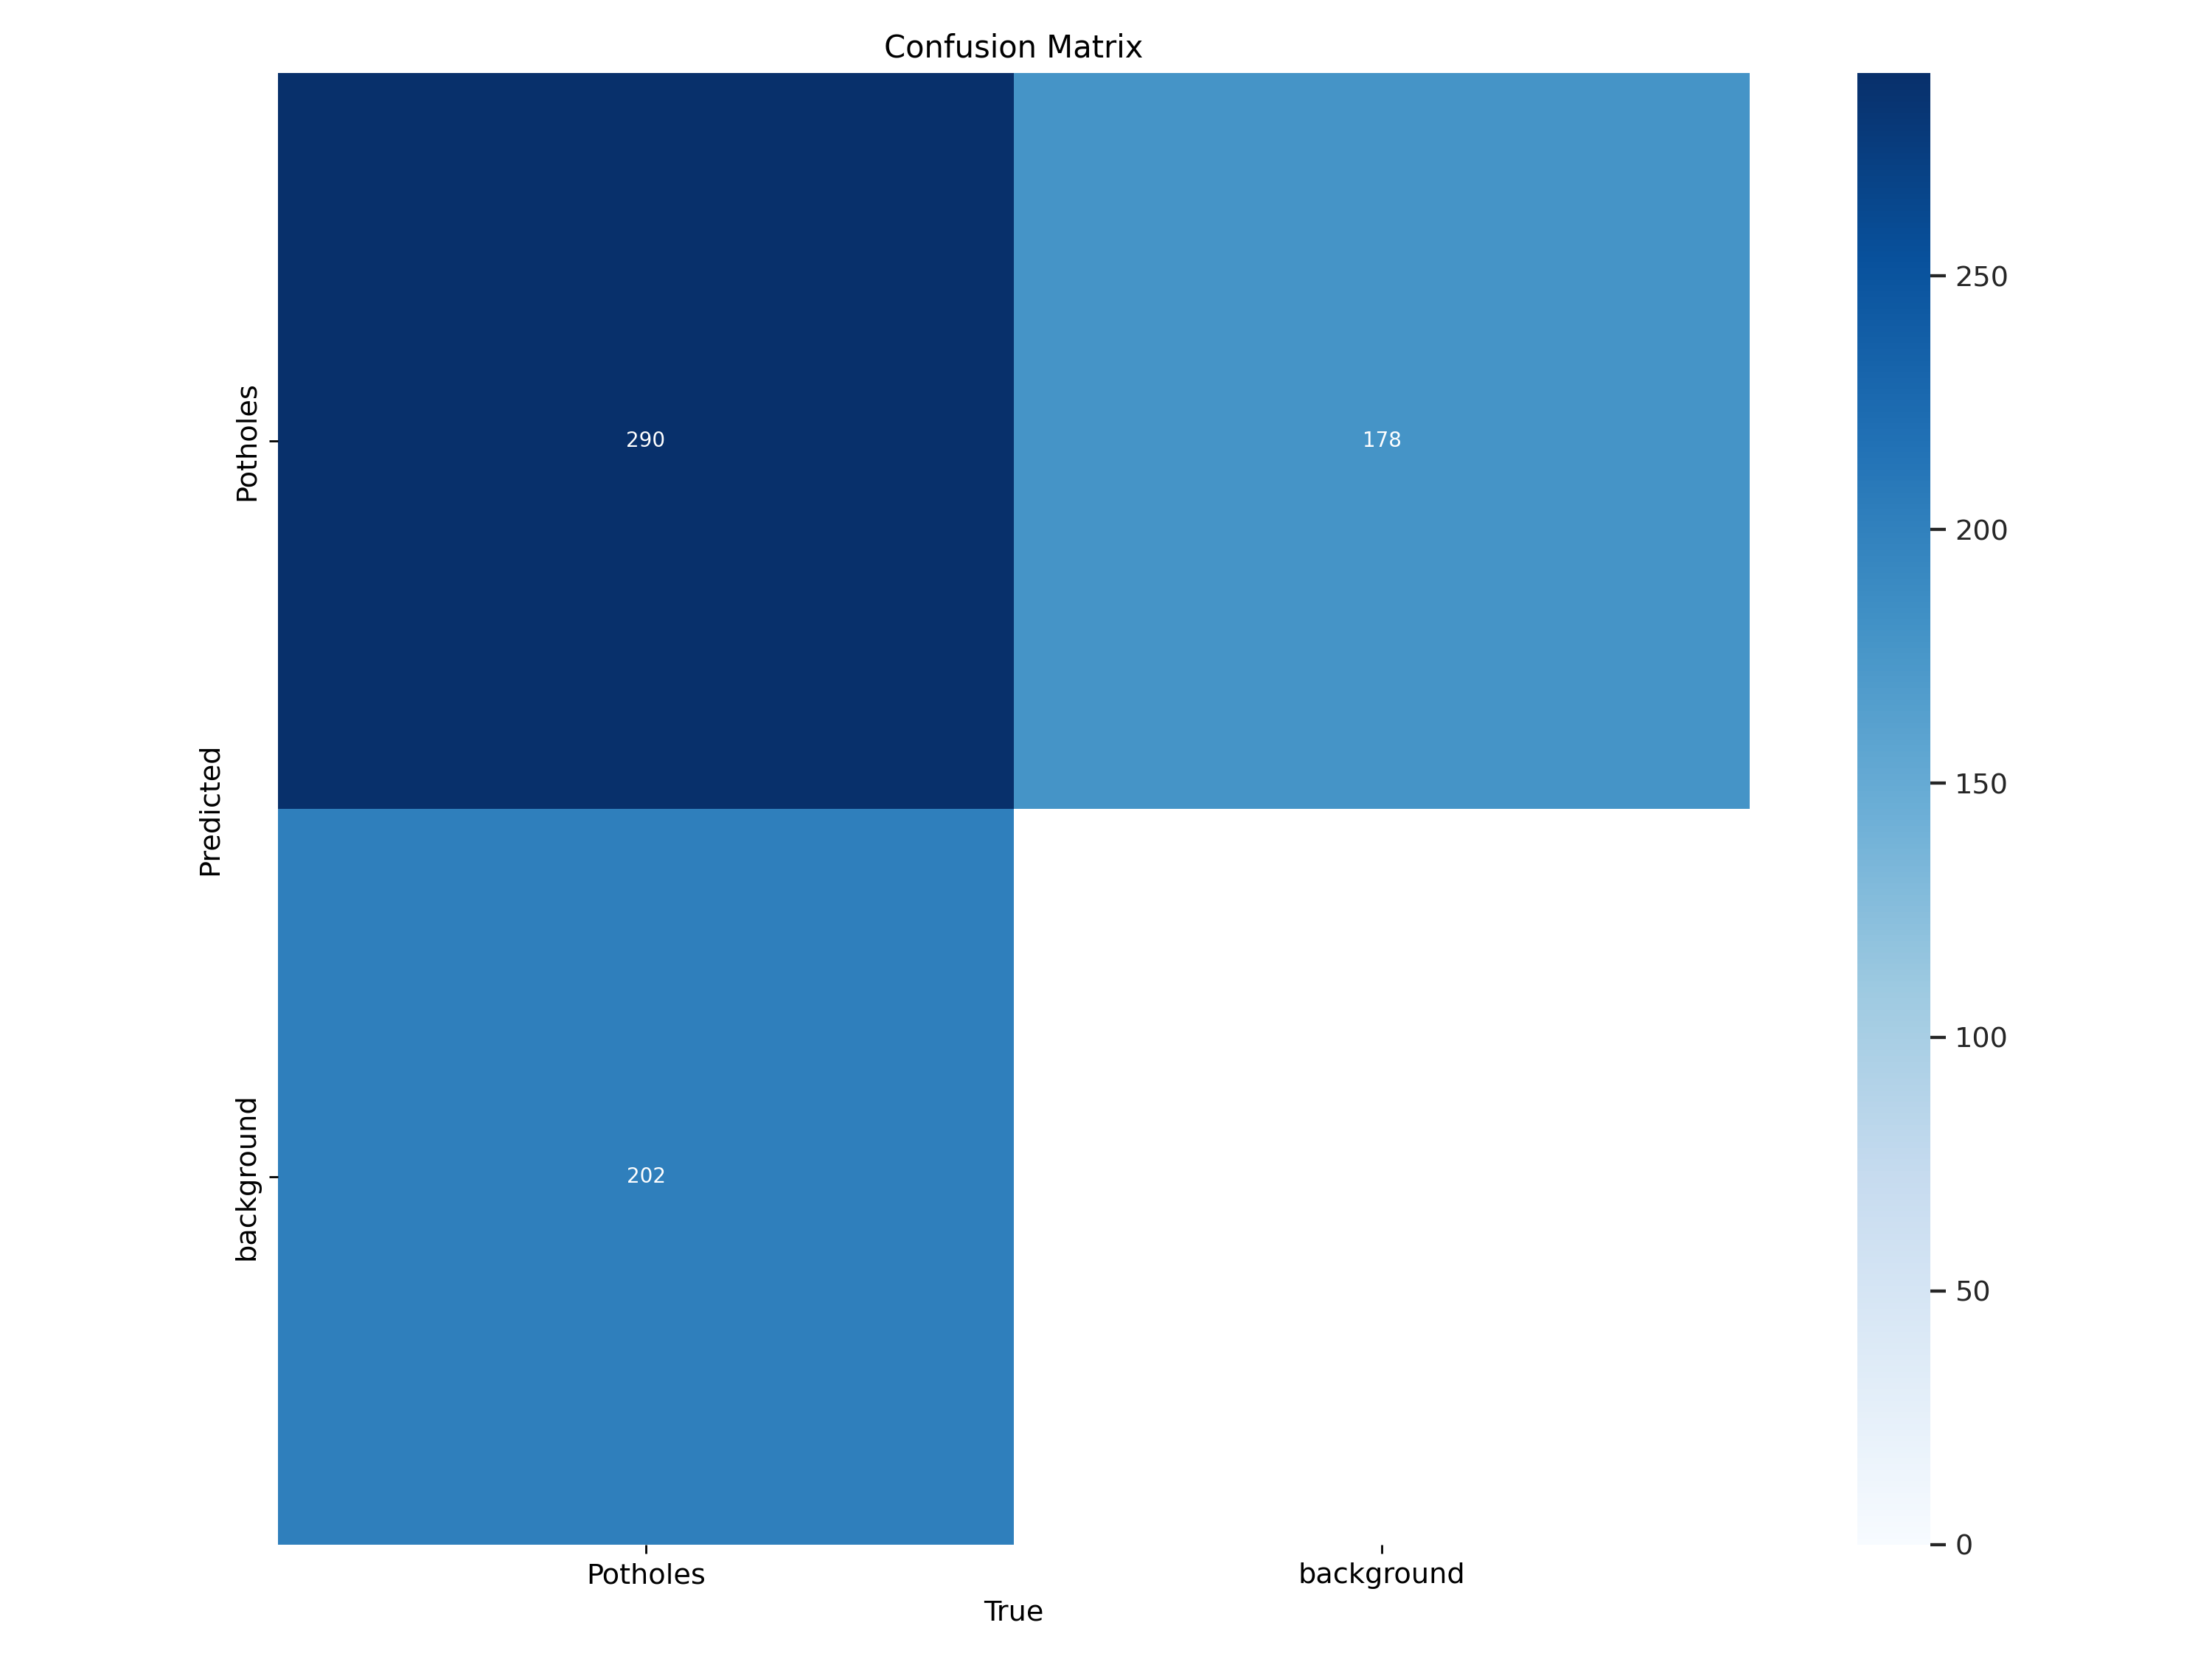

In [ ]:
%cd {HOME}
Image.open('/content/runs/detect/train/confusion_matrix.png')

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [23]:
!pip install  ultralytics

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [21]:
import cv2
import supervision as sv

ModuleNotFoundError: No module named 'supervision'

In [19]:
'''Inference with Custom Model
NOTE: Let's start by loading our newly trained model.'''

from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

ImportError: cannot import name 'YOLOv10' from 'ultralytics' (/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py)

In [ ]:


from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

In [ ]:
#NOTE: Let's randomly select an image from our validation set and visualize the results.

import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)